In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
import warnings


In [2]:
df  = pd.read_csv(r"C:\Users\REFAEY\Desktop\Training Data.csv")

In [3]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
df.shape

(252000, 13)

In [5]:
df.describe()
# to know your data staticly 
#the data need to be scaled 

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [6]:
df.info


<bound method DataFrame.info of             Id   Income  Age  Experience Married/Single House_Ownership  \
0            1  1303834   23           3         single          rented   
1            2  7574516   40          10         single          rented   
2            3  3991815   66           4        married          rented   
3            4  6256451   41           2         single          rented   
4            5  5768871   47          11         single          rented   
...        ...      ...  ...         ...            ...             ...   
251995  251996  8154883   43          13         single          rented   
251996  251997  2843572   26          10         single          rented   
251997  251998  4522448   46           7         single          rented   
251998  251999  6507128   45           0         single          rented   
251999  252000  9070230   70          17         single          rented   

       Car_Ownership           Profession                 CITY  \
0

In [7]:
print(df.isnull().sum())
# check for null values

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64


In [8]:
print(df.dtypes)

Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
object_columns = df.select_dtypes(include=['object']).columns
for column in object_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [10]:
print(df.dtypes)

Id                   int64
Income               int64
Age                  int64
Experience           int64
Married/Single       int32
House_Ownership      int32
Car_Ownership        int32
Profession           int32
CITY                 int32
STATE                int32
CURRENT_JOB_YRS      int64
CURRENT_HOUSE_YRS    int64
Risk_Flag            int64
dtype: object


In [11]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,1,2,0,33,251,13,3,13,0
1,2,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3,3991815,66,4,0,2,0,47,8,12,4,10,0
3,4,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5,5768871,47,11,1,2,0,11,296,22,3,14,1


In [12]:
print(df['Risk_Flag'].value_counts())

Risk_Flag
0    221004
1     30996
Name: count, dtype: int64


<Axes: xlabel='Risk_Flag', ylabel='count'>

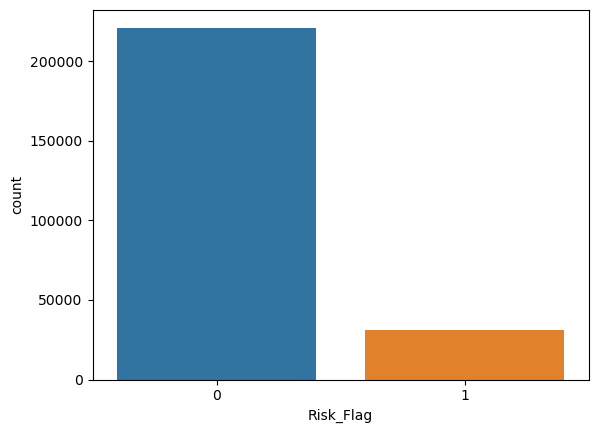

In [13]:
sns.countplot(x="Risk_Flag", data=df)


In [14]:
y = df["Risk_Flag"].values

In [15]:
X = df.drop(labels=["Risk_Flag","Id"], axis=1)
X.describe()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,0.897905,1.891722,0.301587,25.276746,158.137675,13.808952,6.333877,11.997794
std,2.878311e+06,17.063855,6.002590,0.302774,0.391880,0.458948,14.728537,92.201736,9.372300,3.647053,1.399037
min,1.031000e+04,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,2.503015e+06,35.000000,5.000000,1.000000,2.000000,0.000000,13.000000,78.000000,6.000000,3.000000,11.000000
50%,5.000694e+06,50.000000,10.000000,1.000000,2.000000,0.000000,26.000000,157.000000,14.000000,6.000000,12.000000
75%,7.477502e+06,65.000000,15.000000,1.000000,2.000000,1.000000,38.000000,238.000000,22.000000,9.000000,13.000000
max,9.999938e+06,79.000000,20.000000,1.000000,2.000000,1.000000,50.000000,316.000000,28.000000,14.000000,14.000000


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:] = sc.fit_transform(X[:])
X.describe()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
count,2.520000e+05,2.520000e+05,2.520000e+05,2.520000e+05,2.520000e+05,2.520000e+05,2.520000e+05,2.520000e+05,2.520000e+05,2.520000e+05,2.520000e+05
mean,4.436663e-17,-1.699663e-16,1.169576e-16,1.620996e-16,-2.257665e-16,-1.233863e-16,-5.526444e-17,-1.455908e-16,4.968160e-17,-7.818790e-17,-5.072486e-16
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.732550e+00,-1.696811e+00,-1.680018e+00,-2.965599e+00,-4.827305e+00,-6.571287e-01,-1.716178e+00,-1.715130e+00,-1.473382e+00,-1.736714e+00,-1.427981e+00
25%,-8.665174e-01,-8.763612e-01,-8.470421e-01,3.372000e-01,2.763037e-01,-6.571287e-01,-8.335363e-01,-8.691575e-01,-8.331965e-01,-9.141308e-01,-7.132018e-01
50%,1.243035e-03,2.691576e-03,-1.406671e-02,3.372000e-01,2.763037e-01,-6.571287e-01,4.910572e-02,-1.233900e-02,2.038432e-02,-9.154724e-02,1.577052e-03
75%,8.617520e-01,8.817444e-01,8.189087e-01,3.372000e-01,2.763037e-01,1.521772e+00,8.638522e-01,8.661712e-01,8.739652e-01,7.310363e-01,7.163559e-01
max,1.738114e+00,1.702194e+00,1.651884e+00,3.372000e-01,2.763037e-01,1.521772e+00,1.678599e+00,1.712144e+00,1.514151e+00,2.102009e+00,1.431135e+00


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [18]:
# #from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(X_train,y_train)

# #accuracy 89%

In [19]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree model
model = DecisionTreeRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

##accuracy 88%

DecisionTreeRegressor()

In [20]:
# from sklearn.ensemble import RandomForestRegressor

# # Create a random forest model
# model = RandomForestRegressor()

# # Fit the model to the training data
# model.fit(X_train, y_train)

# #accuracy 89%

In [21]:
y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
mse = mean_squared_error(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)
print("MSE = ",mse)
print("MAE = ",mae)
print("R2 = ",r2)

MSE =  0.08782556331165571
MAE =  0.12755723382131362
R2 =  -0.25079125434580285


In [23]:
y_pred_binary = (y_pred > 0.5).astype(int)

In [24]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred_binary)
print("Accuracy: "+str(acc)+" %")

Accuracy: 0.8801587301587301 %


In [25]:
# Create a DataFrame with the test dataset

new_dataDf = pd.read_csv(r"C:\Users\REFAEY\Desktop\Test Data.csv")
new_dataDf.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [26]:
new_data_df = new_dataDf.drop(labels=["Id"], axis=1)

object_columns = new_data_df.select_dtypes(include=['object']).columns

for column in object_columns:
    new_data_df[column] = label_encoder.fit_transform(new_data_df[column])

In [35]:
#take index input from user
chosen_index = int(input("Enter the ID of the person you want to make predictions on: "))

#equal index to id
chosen_index = chosen_index - 1

# Check if the chosen index is within the valid range
if chosen_index < new_dataDf.shape[0]:
    # Extract the features for the chosen person
    chosen_person_features = new_data_df.iloc[[chosen_index]]

    # Scale the chosen person's features using the same scaler used for training
    chosen_person_features_scaled = sc.transform(chosen_person_features)
    
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        # Make the prediction
        prediction = model.predict(chosen_person_features_scaled)

    # Convert the prediction to binary (1 or 0)
    prediction_binary = (prediction > 0.5).astype(int)

    # Display details of the chosen person with a loan
    print("\nDetails of the person with the chosen ID:")
    print("--------------------------")
    details_of_chosen_person = new_dataDf.iloc[chosen_index]
    for column, value in details_of_chosen_person.items():
        print(f"{column}: {value}")
    print("--------------------------")
    # Display the prediction result
    if prediction_binary[0] == 1:
        print("-> The person is predicted to have a high risk (1), and may face challenges in getting a loan.")
    else:
        print("-> The person is predicted to have a low risk (0), and may be eligible for a loan.")
else:
    print("#############")
    print("Invalid ID!")
    print("#############")


Enter the ID of the person you want to make predictions on: 73827382
#############
Invalid ID!
#############
